In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

engagement_df = pd.read_csv('takehome_user_engagement.csv')
engagement_df.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [2]:
takehome_users_df = pd.read_csv('takehome_users.csv',encoding='latin-1')
takehome_users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [3]:
engagement_df

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [4]:
takehome_users_df['last_session_creation_time'] = pd.to_datetime(takehome_users_df['last_session_creation_time'], unit = 's')

In [5]:
takehome_users_df.rename(columns={'object_id':'user_id',},inplace=True)

In [6]:
engagement_df['user_id'] = engagement_df['user_id'].astype(str)
takehome_users_df['org_id'] = takehome_users_df['org_id'].astype(str)
takehome_users_df['invited_by_user_id'] = takehome_users_df['invited_by_user_id'].astype(str)
takehome_users_df['user_id'] = takehome_users_df['user_id'].astype(int)

In [7]:
takehome_users_df['last_session_creation_time'] = pd.to_datetime(takehome_users_df['last_session_creation_time'], unit = 's')
engagement_df['time_stamp'] = [datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in engagement_df['time_stamp']]
takehome_users_df['creation_time'] = [datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in takehome_users_df['creation_time']]

In [8]:
takehome_users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   user_id                     12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  object        
 9   invited_by_user_id          12000 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(5)
memory usage: 937.6+ KB


In [9]:
takehome_users_df.isnull().sum()

user_id                          0
creation_time                    0
name                             0
email                            0
creation_source                  0
last_session_creation_time    3177
opted_in_to_mailing_list         0
enabled_for_marketing_drip       0
org_id                           0
invited_by_user_id               0
dtype: int64

In [10]:
engagement_df.isnull().sum()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [11]:
engagement_df['month'] = engagement_df['time_stamp'].dt.month

In [12]:
engagement_df['year'] = engagement_df['time_stamp'].dt.year

In [13]:
engagement_df['hours'] = engagement_df['time_stamp'].dt.hour

<AxesSubplot:xlabel='month'>

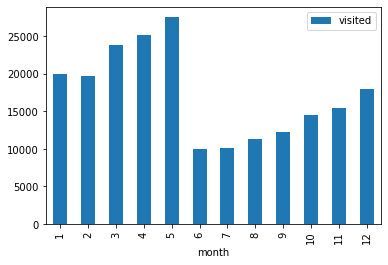

In [14]:
engagement_df.groupby(['month'])['visited'].count().plot(kind = 'bar', legend=True)

In [15]:
engagement_df.groupby(['month'])['visited'].count().reset_index()

,month,visited
0,1,19947
1,2,19724
2,3,23770
3,4,25164
4,5,27563
5,6,10003
6,7,10096
7,8,11323
8,9,12317
9,10,14478


<AxesSubplot:xlabel='year', ylabel='visited'>

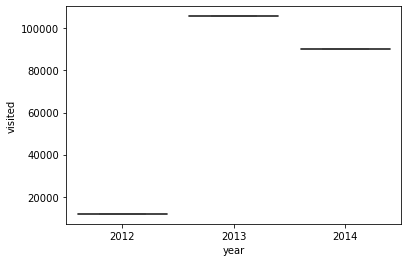

In [16]:
sns.boxplot(data = engagement_df.groupby(['year'])['visited'].count().reset_index(), x = 'year', y = 'visited')

<AxesSubplot:xlabel='hours', ylabel='visited'>

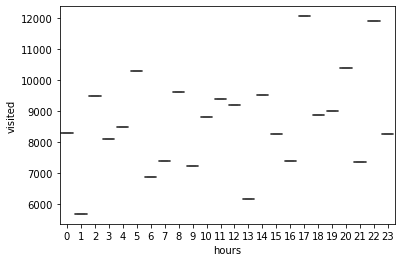

In [17]:
sns.boxplot(data = engagement_df.groupby(['hours'])['visited'].count().reset_index(), x = 'hours', y = 'visited')

In [18]:
takehome_users_df['last_session_creation_time'].min(), takehome_users_df['last_session_creation_time'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [19]:
takehome_users_df['creation_time'].min(), takehome_users_df['creation_time'].max()

(Timestamp('2012-05-31 00:43:27'), Timestamp('2014-05-30 23:59:19'))

In [20]:
engagement_df['time_stamp'].min(), engagement_df['time_stamp'].max()

(Timestamp('2012-05-31 08:20:06'), Timestamp('2014-06-06 14:58:50'))

In [21]:
engagement_copy = engagement_df.copy()

In [22]:
engagement_copy['date'] = pd.to_datetime(engagement_copy.time_stamp.dt.date)

In [23]:
engagement_copy.head()

,time_stamp,user_id,visited,month,year,hours,date
0,2014-04-22 03:53:30,1,1,4,2014,3,2014-04-22
1,2013-11-15 03:45:04,2,1,11,2013,3,2013-11-15
2,2013-11-29 03:45:04,2,1,11,2013,3,2013-11-29
3,2013-12-09 03:45:04,2,1,12,2013,3,2013-12-09
4,2013-12-25 03:45:04,2,1,12,2013,3,2013-12-25


In [24]:
def rolling_method(group,freq):
    return group.rolling(freq, on='date')['user_id'].count()


engagement_copy['7 days'] = engagement_copy.groupby('user_id', as_index = False, group_keys = False).apply(rolling_method,'7D')

In [25]:
engagement_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
visited,207917.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
month,207917.0,5.930112,3.529426,1.0,3.0,5.0,9.0,12.0
year,207917.0,2013.377468,0.590782,2012.0,2013.0,2013.0,2014.0,2014.0
hours,207917.0,11.903971,6.925119,0.0,6.0,12.0,18.0,23.0
7 days,207917.0,4.381393,2.042666,1.0,3.0,4.0,6.0,7.0


In [26]:
engagement_copy[engagement_copy['7 days'] >= 3.0]

,time_stamp,user_id,visited,month,year,hours,date,7 days
9,2014-02-09 03:45:04,2,1,2,2014,3,2014-02-09,3.0
10,2014-02-13 03:45:04,2,1,2,2014,3,2014-02-13,3.0
27,2013-02-19 22:08:03,10,1,2,2013,22,2013-02-19,3.0
30,2013-03-02 22:08:03,10,1,3,2013,22,2013-03-02,3.0
31,2013-03-05 22:08:03,10,1,3,2013,22,2013-03-05,3.0
...,...,...,...,...,...,...,...,...
207898,2014-05-23 11:04:47,11988,1,5,2014,11,2014-05-23,6.0
207899,2014-05-24 11:04:47,11988,1,5,2014,11,2014-05-24,6.0
207900,2014-05-26 11:04:47,11988,1,5,2014,11,2014-05-26,5.0
207901,2014-05-27 11:04:47,11988,1,5,2014,11,2014-05-27,5.0


In [27]:
user_adopted = engagement_copy.groupby('user_id')['7 days'].max().reset_index().sort_values(by = 'user_id')
user_adopted.head()

,user_id,7 days
0,1,1.0
1,10,7.0
2,100,1.0
3,10000,2.0
4,10002,4.0


In [28]:
user_adopted['adopted_user'] = user_adopted['7 days'].apply(lambda x: 1 if x >= 3 else 0)
user_adopted.head()

,user_id,7 days,adopted_user
0,1,1.0,0
1,10,7.0,1
2,100,1.0,0
3,10000,2.0,0
4,10002,4.0,1


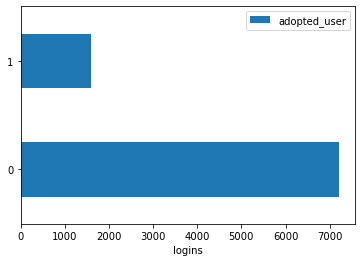

In [29]:
user_adopted.adopted_user.value_counts().plot(kind='barh')
plt.xlabel('logins')
plt.legend()

In [30]:
user_adopted.user_id.nunique()

8823

In [31]:
engagement_df.user_id.nunique()

8823

In [32]:
user_adopted.drop(['7 days'],axis=1,inplace=True)

In [33]:
user_adopted.rename(columns = {'user_id':'object_id'},inplace=True)

In [34]:
takehome_users_df.rename(columns = {'user_id':'object_id'},inplace=True)

In [35]:
takehome_users_df['object_id'] = takehome_users_df['object_id'].astype(str)

In [36]:
merged_df = takehome_users_df.merge(user_adopted, on='object_id', how='left')

In [37]:
merged_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0


<AxesSubplot:ylabel='creation_source'>

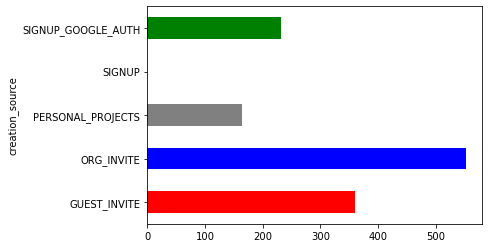

In [38]:
merged_df.groupby('creation_source')['adopted_user'].sum().plot(kind='barh', stacked=True, color = ['red','blue','gray','white','green'])

In [39]:
merged_df['active_days'] = merged_df.last_session_creation_time - merged_df.creation_time 

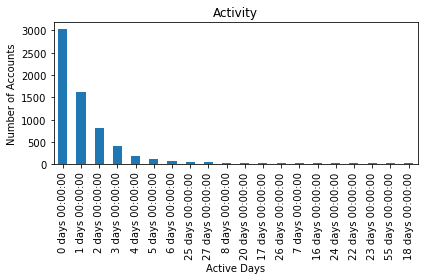

In [40]:
merged_df.active_days.value_counts().head(20).plot(kind='bar')
plt.title('Activity')
plt.ylabel('Number of Accounts')
plt.xlabel('Active Days')
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='adopted_user', ylabel='count'>

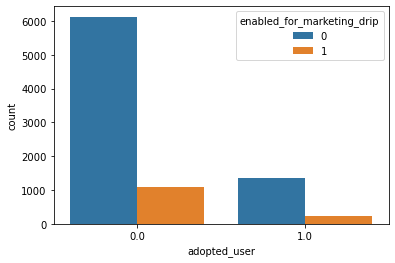

In [41]:
sns.countplot(x = 'adopted_user',data = merged_df, hue = 'enabled_for_marketing_drip')

<AxesSubplot:xlabel='adopted_user', ylabel='count'>

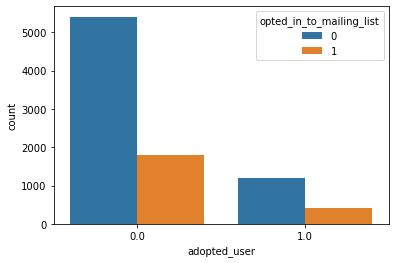

In [42]:
sns.countplot(x = 'adopted_user',data = merged_df, hue = 'opted_in_to_mailing_list')

In [43]:
merged_df.dropna(inplace=True)

In [44]:
def split_email(data):
    return data.split('@')[1]

In [45]:
merged_df['email_domain'] = merged_df['email'].apply(split_email)

<AxesSubplot:>

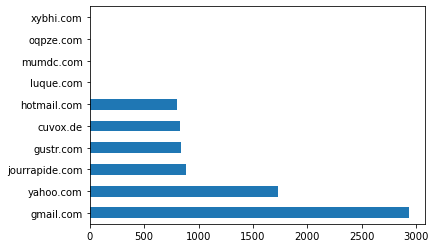

In [46]:
merged_df['email_domain'].value_counts().head(10).plot(kind='barh')

In [47]:
merged_df['invited_by_user_id'].value_counts()

nan        4047
4612.0       10
11770.0       9
2308.0        9
730.0         8
           ... 
6455.0        1
3689.0        1
1255.0        1
6420.0        1
5093.0        1
Name: invited_by_user_id, Length: 2230, dtype: int64

In [48]:
merged_df['active_days'] = merged_df['active_days'].astype(str)

In [49]:
merged_df['active_days'] = merged_df['active_days'].apply(lambda x: x.split(' ')[0])

In [50]:
merged_df.active_days = merged_df['active_days'].astype(int)

In [51]:
merged_df.groupby('creation_source')['active_days'].mean()

creation_source
GUEST_INVITE          74.846348
ORG_INVITE            55.227729
PERSONAL_PROJECTS     67.557592
SIGNUP                50.307165
SIGNUP_GOOGLE_AUTH    58.121300
Name: active_days, dtype: float64

In [52]:
merged_df.describe().T

,count,mean,std,min,25%,50%,75%,max
opted_in_to_mailing_list,8823.0,0.252295,0.434354,0.0,0.0,0.0,1.0,1.0
enabled_for_marketing_drip,8823.0,0.151989,0.359031,0.0,0.0,0.0,0.0,1.0
adopted_user,8823.0,0.181571,0.385512,0.0,0.0,0.0,0.0,1.0
active_days,8823.0,59.222147,144.172167,0.0,0.0,1.0,20.0,729.0


<AxesSubplot:>

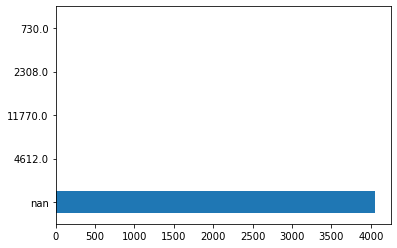

In [53]:
merged_df.invited_by_user_id.value_counts().head().plot(kind='barh')

In [54]:
merged_df

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,active_days,email_domain
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0.0,0,yahoo.com
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1.0,136,gustr.com
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0.0,0,gustr.com
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0.0,1,yahoo.com
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0.0,5,yahoo.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,2013-09-06 06:14:15,0,0,89,8263.0,0.0,0,gustr.com
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,2013-01-15 18:28:37,0,0,200,nan,0.0,5,gmail.com
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,2014-04-27 12:45:16,1,1,83,8074.0,0.0,0,cuvox.de
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,2012-06-02 11:55:59,0,0,6,nan,0.0,2,iuxiw.com


In [55]:
merged_df.drop(['creation_time','name','email','last_session_creation_time'],axis=1,inplace=True)

In [56]:
merged_df.isnull().sum()

object_id                     0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
adopted_user                  0
active_days                   0
email_domain                  0
dtype: int64

In [57]:
merged_df['invited_by_user_id'].replace('nan',0,inplace=True)

In [58]:
merged_df

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,active_days,email_domain
0,1,GUEST_INVITE,1,0,11,10803.0,0.0,0,yahoo.com
1,2,ORG_INVITE,0,0,1,316.0,1.0,136,gustr.com
2,3,ORG_INVITE,0,0,94,1525.0,0.0,0,gustr.com
3,4,GUEST_INVITE,0,0,1,5151.0,0.0,1,yahoo.com
4,5,GUEST_INVITE,0,0,193,5240.0,0.0,5,yahoo.com
...,...,...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,89,8263.0,0.0,0,gustr.com
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,200,0,0.0,5,gmail.com
11997,11998,GUEST_INVITE,1,1,83,8074.0,0.0,0,cuvox.de
11998,11999,PERSONAL_PROJECTS,0,0,6,0,0.0,2,iuxiw.com


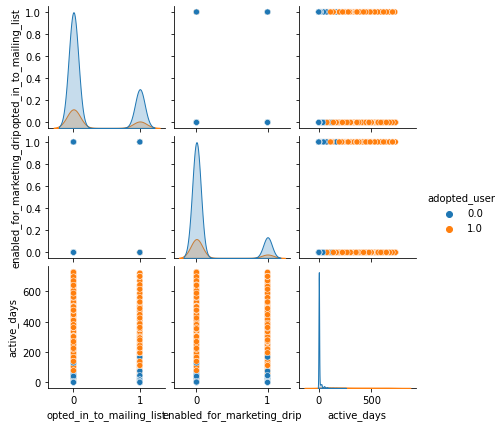

In [59]:
sns.pairplot(merged_df, hue = 'adopted_user',diag_kind = 'kde', height = 2.0)

In [60]:
merged_df.drop(['email_domain'],axis=1,inplace=True)

In [79]:
merged_df['invited_by_user_id'] = merged_df['invited_by_user_id'].astype(float)

In [86]:
merged_df['invited_by_user_id'] = (merged_df['invited_by_user_id'] / merged_df['invited_by_user_id']).where(merged_df['invited_by_user_id'] > 0, 0)

In [89]:
merged_df.creation_source.value_counts()

ORG_INVITE            3188
SIGNUP                1898
GUEST_INVITE          1588
SIGNUP_GOOGLE_AUTH    1385
PERSONAL_PROJECTS      764
Name: creation_source, dtype: int64

In [91]:
x = merged_df.drop(['adopted_user'],axis=1)
y = merged_df[['adopted_user']]

In [98]:
merged_df.head()

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,active_days
0,1,GUEST_INVITE,1,0,11,1.0,0.0,0
1,2,ORG_INVITE,0,0,1,1.0,1.0,136
2,3,ORG_INVITE,0,0,94,1.0,0.0,0
3,4,GUEST_INVITE,0,0,1,1.0,0.0,1
4,5,GUEST_INVITE,0,0,193,1.0,0.0,5


In [99]:
merged_df.drop(['org_id'],axis=1,inplace=True)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'GUEST_INVITE'),
  Text(1, 0, 'ORG_INVITE'),
  Text(2, 0, 'SIGNUP'),
  Text(3, 0, 'PERSONAL_PROJECTS'),
  Text(4, 0, 'SIGNUP_GOOGLE_AUTH')])

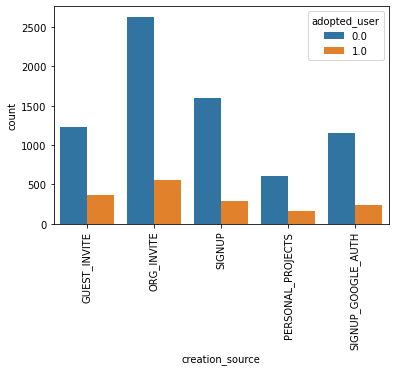

In [122]:
_ = sns.countplot(x = 'creation_source', data = merged_df, hue = 'adopted_user')
_ = plt.xticks(rotation= 90)

In [125]:
merged_df

,object_id,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,adopted_user,active_days
0,1,GUEST_INVITE,1,0,1.0,0.0,0
1,2,ORG_INVITE,0,0,1.0,1.0,136
2,3,ORG_INVITE,0,0,1.0,0.0,0
3,4,GUEST_INVITE,0,0,1.0,0.0,1
4,5,GUEST_INVITE,0,0,1.0,0.0,5
...,...,...,...,...,...,...,...
11995,11996,ORG_INVITE,0,0,1.0,0.0,0
11996,11997,SIGNUP_GOOGLE_AUTH,0,0,0.0,0.0,5
11997,11998,GUEST_INVITE,1,1,1.0,0.0,0
11998,11999,PERSONAL_PROJECTS,0,0,0.0,0.0,2


ValueError: 'history' is not a valid estimator for `bins`

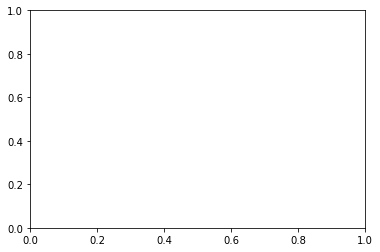

In [124]:
_ = plt.hist(merged_df['adopted_user'], 'history')

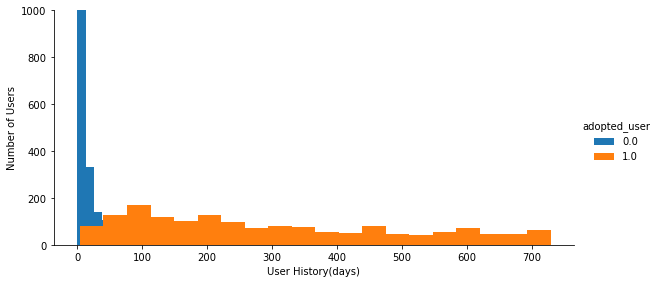

In [95]:
g = sns.FacetGrid(merged_df, hue='adopted_user',height=4, aspect=2)
g.map(plt.hist, 'active_days', bins=20)
g.add_legend()
plt.ylabel('Number of Users')
plt.xlabel('User History(days)')
plt.ylim([0,1000])
plt.show()

In [128]:
creation_source = pd.get_dummies(merged_df['creation_source'], drop_first=True)
model_data = pd.concat([merged_df, creation_source], axis=1).drop('creation_source', axis=1)
y = model_data['adopted_user']
X = model_data.drop('adopted_user', axis=1)
# though account_age and history have different scales than other features,
# I plan to use random forest model, which is not affectd by the different scales
# no need to scale the data
# create training and testing sets
X.drop(['object_id'],axis=1,inplace=True)

In [129]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y, random_state=42)

In [130]:
Xtrain.shape

(6617, 8)

In [131]:
Xtest.shape

(2206, 8)

In [132]:
ytrain.shape

(6617,)

In [133]:
ytest.shape

(2206,)

In [134]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
clf = RandomForestClassifier(random_state=42, class_weight='balanced')
# use CV to tune number of trees
params = {'n_estimators': [10, 50, 100, 200]}
model = GridSearchCV(clf, params)
model.fit(Xtrain, ytrain)
print('Best parameters were', model.best_params_)
print('Best average precision was', model.best_score_)

Best parameters were {'n_estimators': 50}
Best average precision was 0.949070477469269


In [135]:
from sklearn.metrics import classification_report, accuracy_score
model = RandomForestClassifier(
    random_state=42, class_weight='balanced', n_estimators=100
)
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)
print('Accuracy of test set was', accuracy_score(ytest, ypred))
print(classification_report(ytest, ypred))

Accuracy of test set was 0.9528558476881233
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97      1805
         1.0       0.85      0.90      0.87       401

    accuracy                           0.95      2206
   macro avg       0.91      0.93      0.92      2206
weighted avg       0.95      0.95      0.95      2206



In [136]:
imp = pd.Series(model.feature_importances_, index= X.columns)
imp = imp.sort_values(ascending=False)
imp

active_days                   0.985807
opted_in_to_mailing_list      0.003000
enabled_for_marketing_drip    0.002596
ORG_INVITE                    0.002491
SIGNUP                        0.002215
invited_by_user_id            0.001771
PERSONAL_PROJECTS             0.001160
SIGNUP_GOOGLE_AUTH            0.000959
dtype: float64